In [ ]:
import os, random, numpy as np, tensorflow as tf
from tensorflow.keras import layers, Model, Input

# For reproducibility
SEED = 42
random.seed(SEED); np.random.seed(SEED); tf.random.set_seed(SEED)

print("TensorFlow:", tf.__version__)

TensorFlow: 2.19.0


## Import Flickr8k dataset

In [ ]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("adityajn105/flickr8k")

print("Path to dataset files:", path)

Path to dataset files: /kaggle/input/flickr8k


In [ ]:
dataset_path = "/kaggle/input/flickr8k"
print(os.listdir(dataset_path))

['captions.txt', 'Images']


In [ ]:
dataset_path = "/kaggle/input/flickr8k"
images_path = dataset_path + "/Images"
captions_file = dataset_path + "/captions.txt"

In [ ]:
!cp -r /kaggle/input/flickr8k /content/

In [ ]:
captions_file = "/kaggle/input/flickr8k/captions.txt"

# Read first 5 lines
with open(captions_file, "r") as f:
    for i in range(5):
        print(f.readline().strip())

image,caption
1000268201_693b08cb0e.jpg,A child in a pink dress is climbing up a set of stairs in an entry way .
1000268201_693b08cb0e.jpg,A girl going into a wooden building .
1000268201_693b08cb0e.jpg,A little girl climbing into a wooden playhouse .
1000268201_693b08cb0e.jpg,A little girl climbing the stairs to her playhouse .


                       image  \
0  1000268201_693b08cb0e.jpg   
1  1000268201_693b08cb0e.jpg   

                                             caption  
0  A child in a pink dress is climbing up a set o...  
1              A girl going into a wooden building .  


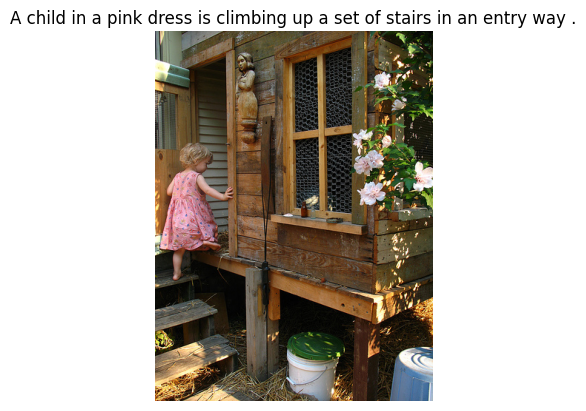

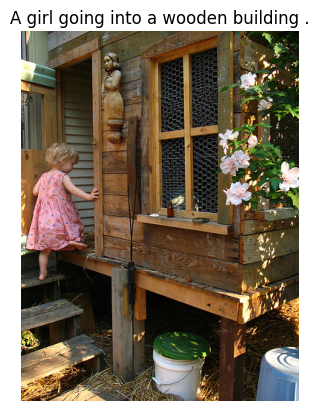

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import pandas as pd

# Load captions file into pandas
df = pd.read_csv(captions_file)
print(df.head(2))  # show first 2 rows of the dataset

# Show first 2 images with captions
for i in range(2):
    img_path = f"/kaggle/input/flickr8k/Images/{df['image'][i]}"
    img = mpimg.imread(img_path)
    plt.imshow(img)
    plt.axis("off")
    plt.title(df['caption'][i])
    plt.show()

## Verify first image with 5 captions (to be used for training)

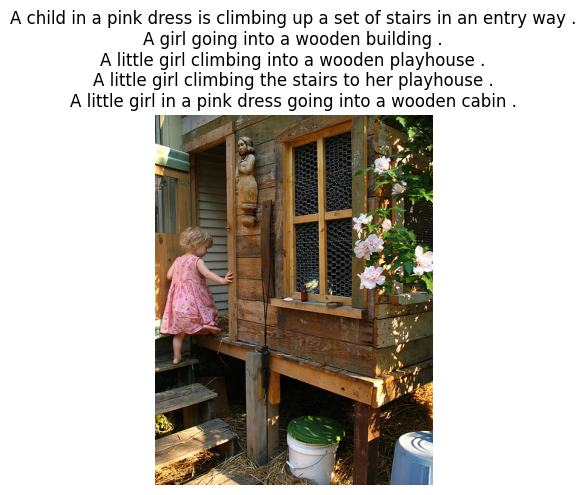

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

captions_file = "/kaggle/input/flickr8k/captions.txt"
df = pd.read_csv(captions_file)

# Group captions by image
grouped = df.groupby("image")["caption"].apply(list)

# Pick first image
first_img = grouped.index[0]
captions = grouped[first_img]

# Display image
img_path = f"/kaggle/input/flickr8k/Images/{first_img}"
img = mpimg.imread(img_path)

plt.imshow(img)
plt.axis("off")
plt.title("\n".join(captions))  # join 5 captions
plt.show()

## Text preprocessing

In [ ]:
import re
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

# Clean captions
def clean_text(text):
    text = text.lower()
    text = re.sub(r"[^a-z]+", " ", text)
    text = text.strip()
    return text

df["clean_caption"] = df["caption"].apply(clean_text)

# Add <start> and <end> tokens
df["clean_caption"] = df["clean_caption"].apply(lambda x: "<start> " + x + " <end>")

# Build vocabulary
tokenizer = Tokenizer(num_words=10000, oov_token="<unk>")
tokenizer.fit_on_texts(df["clean_caption"])

vocab_size = len(tokenizer.word_index) + 1
print("Vocab size:", vocab_size)

# Convert captions → sequences
sequences = tokenizer.texts_to_sequences(df["clean_caption"])

# Pad sequences
max_len = max(len(seq) for seq in sequences)
print("Max caption length:", max_len)

Vocab size: 8443
Max caption length: 38


In [ ]:
# Show first 5 preprocessed captions
for i in range(10):
    print(f"Caption {i+1}: {df['clean_caption'].iloc[i]}")

Caption 1: <start> a child in a pink dress is climbing up a set of stairs in an entry way <end>
Caption 2: <start> a girl going into a wooden building <end>
Caption 3: <start> a little girl climbing into a wooden playhouse <end>
Caption 4: <start> a little girl climbing the stairs to her playhouse <end>
Caption 5: <start> a little girl in a pink dress going into a wooden cabin <end>
Caption 6: <start> a black dog and a spotted dog are fighting <end>
Caption 7: <start> a black dog and a tri colored dog playing with each other on the road <end>
Caption 8: <start> a black dog and a white dog with brown spots are staring at each other in the street <end>
Caption 9: <start> two dogs of different breeds looking at each other on the road <end>
Caption 10: <start> two dogs on pavement moving toward each other <end>
